# Lecture 11 - Lagrange Relaxation

Joseph Paat

*Acknowledgment:* Code taken from Lecture 1 of COMM612 by Prof. Julia Yan.
Lazy DFJ implementation adapted from the [JuMP documentation](https://jump.dev/JuMP.jl/stable/tutorials/algorithms/tsp_lazy_constraints/).

##  Header

In [ ]:
# # Dependencies: Uncomment and run this cell if you don't have these packages 
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("Combinatorics")
# Pkg.add("Plots")

In [12]:
include("tsp-src/data.jl");
include("tsp-src/opt.jl");
include("tsp-src/out.jl");

# Comparing a heuristic to the lower bound by Held Karp

We compare the Lin-Kernighan Keuristic to the optimal value. We look at random instances generated on 100 cities. 

In [13]:
# Multiple random instances on 100 cities

n = 100
opt_vals = Dict([("LKH", []), ("HK", [])])
#opt_vals = Dict([("LKH", []), ("IP", []), ("HK", [])])
all_n = [i for i in 1:20]

for iter in all_n
    dat = TSPInstanceInt(n, 100, random_seed = iter)

    # LK Heuristic
    lk_opt_tour, lk_opt_len = solve_tsp(dat.d)

    #HK bound
    hk_bound = HK_bound(dat,lk_opt_len)
    
    push!(opt_vals["LKH"], lk_opt_len)
    push!(opt_vals["HK"], hk_bound)

end

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/byp3k/src/simpleweightedgraph.jl:182


Plot results

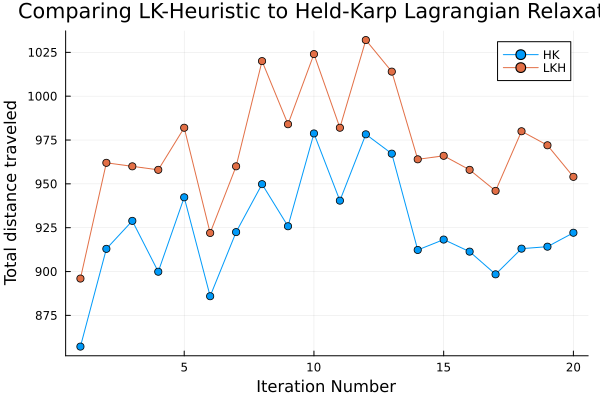

In [14]:
plt = Plots.plot()
for key in keys(opt_vals)
    Plots.plot!(all_n, opt_vals[key], label = key, marker = :circle)    
end

title!("Comparing LK-Heuristic to Held-Karp Lagrangian Relaxation")
xlabel!("Iteration Number")
ylabel!("Total distance traveled")
display(plt)

Plot the optimality gap

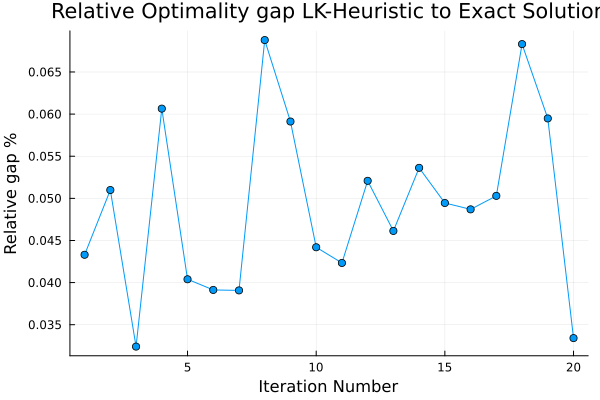

In [15]:
rel_gap = [abs(opt_vals["LKH"][i]-opt_vals["HK"][i])/opt_vals["LKH"][i] for i in all_n]

plt2 = Plots.plot()
Plots.plot!(all_n, rel_gap, marker = :circle,legend=false)    

title!("Relative Optimality gap LK-Heuristic to Exact Solution")
xlabel!("Iteration Number")
ylabel!("Relative gap %")
display(plt2)